# Error Measurement

In [4]:
from calendar import month
from pathlib import Path
from dotenv import dotenv_values

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy.signal import square
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [5]:
DATA_DIR = Path("Exponential Smoothing and Holt Winters")
DATA_PATH = dotenv_values(Path.cwd().parent.parent / ".env")["TIMESERIES_ANALYSIS_DIR"] / DATA_DIR

In [14]:
# read data
df = pd.read_csv(DATA_PATH / "weekly_customer_complaints.csv", index_col="week", parse_dates=True)
# set index frequency
df = df.asfreq("W-Mon")
# guarantee right variable format
df["complaints"] = df["complaints"].str.replace(",", "").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2018-01-01 to 2022-12-26
Freq: W-MON
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   complaints               261 non-null    float64
 1   discount_rate            261 non-null    object 
 2   small_commercial_event   261 non-null    int64  
 3   medium_commercial_event  261 non-null    int64  
 4   big_commercial_event     261 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 12.2+ KB


## MAE, RMSE, MAPE
* **MAE:** mean absolute error, average of absolute differences. Looks at original value scale.</br>
* **RMSE:** root mean squared error, root of average squared differences. Punishes outliers, but not interpretable.
* **MAPE:** mean absolute percentage error, the most interpretable, it gives same weight to all observations.

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

In [15]:
periods = 13
train, test = df.iloc[:-periods, 0], df.iloc[-periods:, 0]

In [16]:
# for double exponential just define trend
# for triple exponential define trend as well as seasonal
model_triple = ExponentialSmoothing(
    train,
    trend="additive",
    seasonal="multiplicative", # based on series plot, check how could be the differences on cycles
    seasonal_periods=52
).fit()
# forecast on test
preds_triple = model_triple.forecast(len(test))

In [22]:
# calculate errors
mae = mean_absolute_error(test, preds_triple)
rmse = root_mean_squared_error(test, preds_triple)
mape = mean_absolute_percentage_error(test, preds_triple)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")

MAE: 366.06
RMSE: 366.06
MAPE: 0.08



## Predicting

In [23]:
# include all data as training data
model_final = ExponentialSmoothing(
    df.complaints,
    trend="additive",
    seasonal="multiplicative", # based on series plot, check how could be the differences on cycles
    seasonal_periods=52
).fit()
# forecast on test
forecast = model_final.forecast(13)

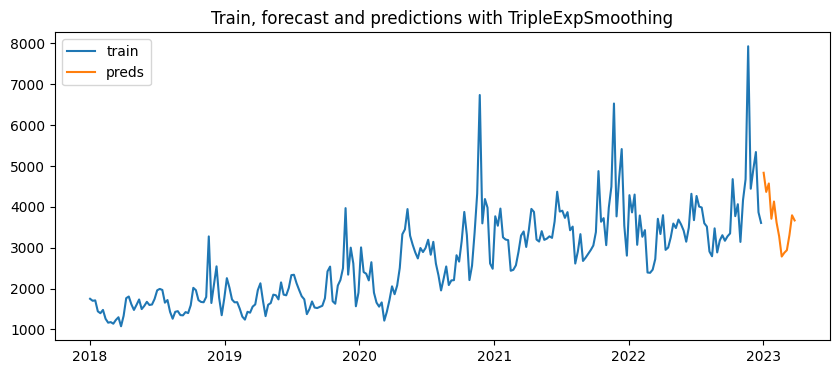

In [25]:
# plot train, test and preds
plt.figure(figsize=(10, 4))
plt.plot(df.complaints, label="train")
plt.plot(forecast, label="preds")
plt.title("Train, forecast and predictions with TripleExpSmoothing")
plt.legend()
plt.show()

## Daily data

In [26]:
# read data
df = pd.read_csv(DATA_PATH / "bitcoin_price.csv", index_col="Date", parse_dates=True)
# set index frequency
df = df.asfreq("D")
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3392 entries, 2014-09-17 to 2023-12-30
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3392 non-null   float64
 1   High       3392 non-null   float64
 2   Low        3392 non-null   float64
 3   Close      3392 non-null   float64
 4   Adj Close  3392 non-null   float64
 5   Volume     3392 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.5 KB


In [27]:
periods = 30
train, test = df.iloc[:-periods, 3], df.iloc[-periods:, 3]

In [32]:
# for double exponential just define trend
# for triple exponential define trend as well as seasonal
model_triple = ExponentialSmoothing(
    train,
    trend="multiplicative",
    seasonal="multiplicative", # based on series plot, check how could be the differences on cycles
    seasonal_periods=7
).fit()
# forecast on test
preds_triple = model_triple.forecast(len(test))

/opt/homebrew/Caskroom/miniconda/base/envs/timeseries/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


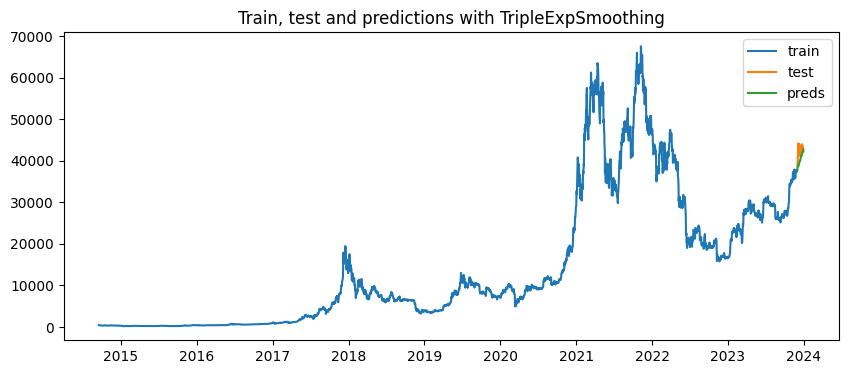

In [33]:
# plot train, test and preds
plt.figure(figsize=(10, 4))
plt.plot(train, label="train")
plt.plot(test, label="test")
plt.plot(preds_triple, label="preds")
plt.title("Train, test and predictions with TripleExpSmoothing")
plt.legend()
plt.show()

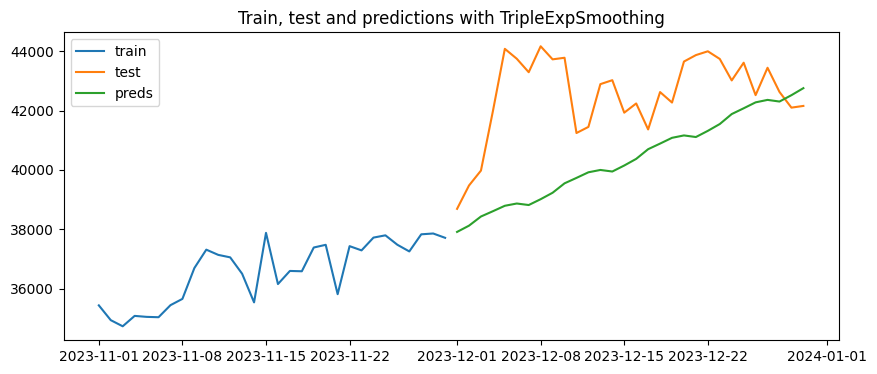

In [37]:
# plot train, test and preds
plt.figure(figsize=(10, 4))
plt.plot(train['2023-11'], label="train")
plt.plot(test, label="test")
plt.plot(preds_triple, label="preds")
plt.title("Train, test and predictions with TripleExpSmoothing")
plt.legend()
plt.show()

In [36]:
# calculate errors
mae = mean_absolute_error(test, preds_triple)
rmse = root_mean_squared_error(test, preds_triple)
mape = mean_absolute_percentage_error(test, preds_triple)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {mae:.2f}")
print(f"MAPE: {mape:.2f}")

MAE: 2242.57
RMSE: 2242.57
MAPE: 0.05
